## 📊 Análisis Exploratorio de Datos (EDA)

Exploración gráfica y estadística de las campañas de márketing para identificar patrones relevantes.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
from difflib import get_close_matches

Carga de los datos

In [15]:
df = pd.read_csv(r'C:\Users\Victor\Documents\GitHub\marketing\data\marketingcampaigns_clean.csv')

In [16]:
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,...,budget_category,conversion_performance,profit_margin,revenue_per_day,is_profitable,is_high_performing,is_holiday_campaign,is_long_campaign,is_digital,cost_per_conversion
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,...,low budget,Media,0.988610,2163.394756,1,0,0,0,1,202.057500
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,...,low budget,Alta,0.965713,1195.854398,1,1,0,1,0,268.378485
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,...,high budget,Baja,0.815281,1553.313288,1,0,1,0,1,3022.967857
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,...,low budget,Baja,0.837817,245.788880,1,0,0,1,1,767.881579
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,...,medium budget,Alta,0.173000,151.793450,1,0,0,0,0,485.085185


1. Análisis de frecuencia de canales

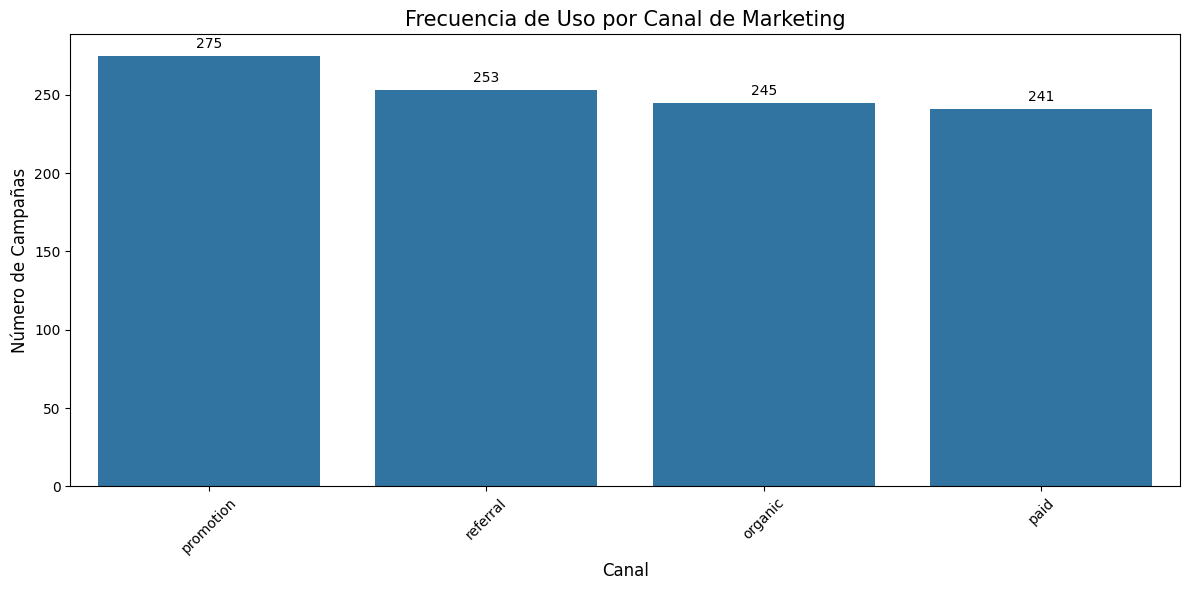

In [17]:
plt.figure(figsize=(12, 6))
channel_counts = df['channel'].value_counts()
ax = sns.barplot(x=channel_counts.index, y=channel_counts.values)
plt.title('Frecuencia de Uso por Canal de Marketing', fontsize=15)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('Número de Campañas', fontsize=12)
plt.xticks(rotation=45)

# Añadir etiquetas con valores
for i, v in enumerate(channel_counts.values):
    ax.text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()

2. Análisis de ROI por canal

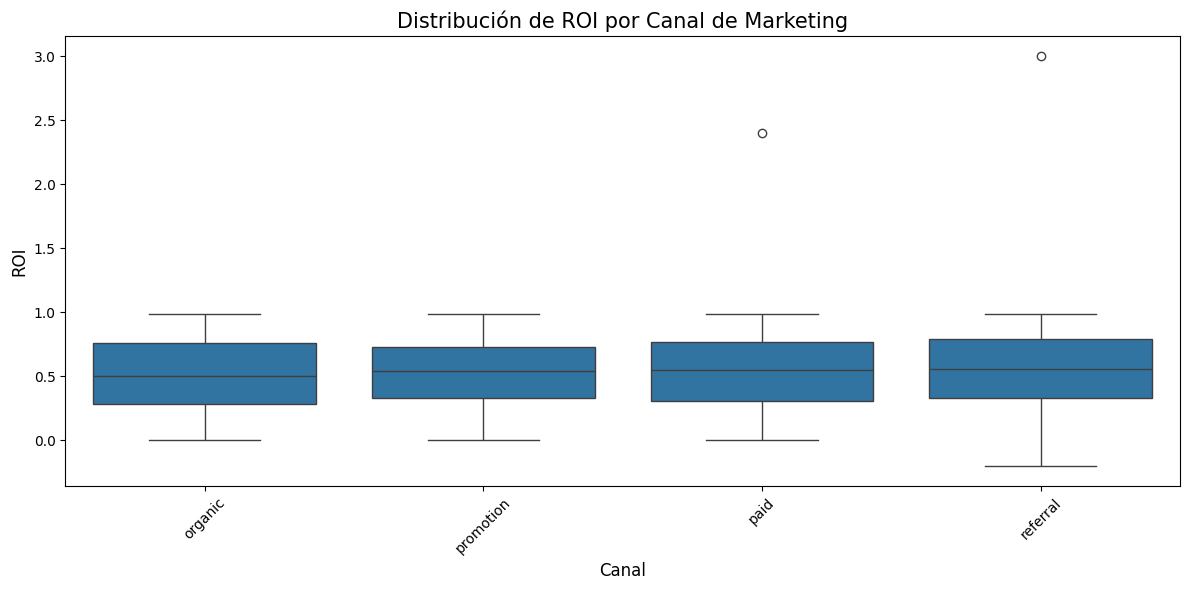

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='channel', y='roi', data=df)
plt.title('Distribución de ROI por Canal de Marketing', fontsize=15)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Métricas comparativas por canal

In [19]:
channel_metrics = df.groupby('channel').agg({
    'roi': 'mean',
    'conversion_rate': 'mean',
    'profit_margin': 'mean',
    'revenue': 'mean',
    'budget': 'mean',
    'campaign_name': 'count'
}).sort_values(by='roi', ascending=False)

channel_metrics = channel_metrics.rename(columns={'campaign_name': 'num_campaigns'})
channel_metrics = channel_metrics.reset_index()

print("Métricas de Rendimiento por Canal (ordenadas por ROI promedio):")
print(channel_metrics[['channel', 'num_campaigns', 'roi', 'conversion_rate', 'profit_margin', 'revenue', 'budget']])

Métricas de Rendimiento por Canal (ordenadas por ROI promedio):
     channel  num_campaigns       roi  conversion_rate  profit_margin  \
0   referral            253  0.559486         0.535731       0.590266   
1       paid            241  0.547552         0.553610      -1.572811   
2  promotion            275  0.532182         0.541273       0.691113   
3    organic            245  0.516694         0.536490       0.675196   

         revenue        budget  
0  480482.904506  48231.617431  
1  528362.316598  49876.956888  
2  497463.651927  50075.167773  
3  547210.905224  49608.361959  


4. Gráfico de barras para ROI promedio

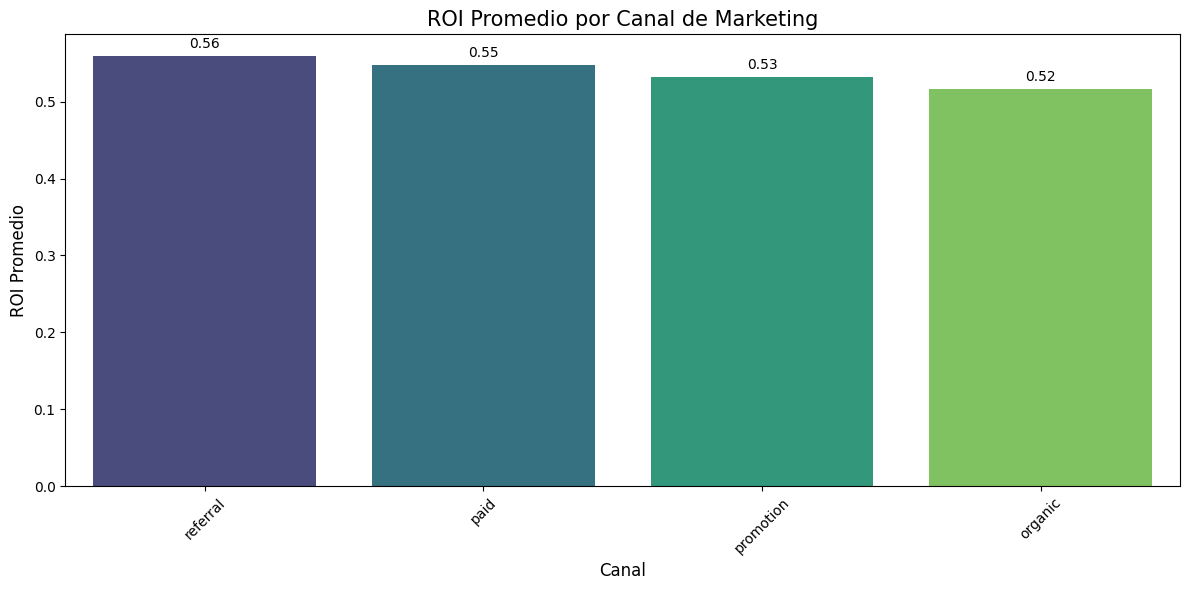

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='channel', y='roi', data=channel_metrics, palette='viridis')
plt.title('ROI Promedio por Canal de Marketing', fontsize=15)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('ROI Promedio', fontsize=12)
plt.xticks(rotation=45)

# Añadir etiquetas con valores de ROI
for i, v in enumerate(channel_metrics['roi']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

5. Análisis por tipo de campaña y canal

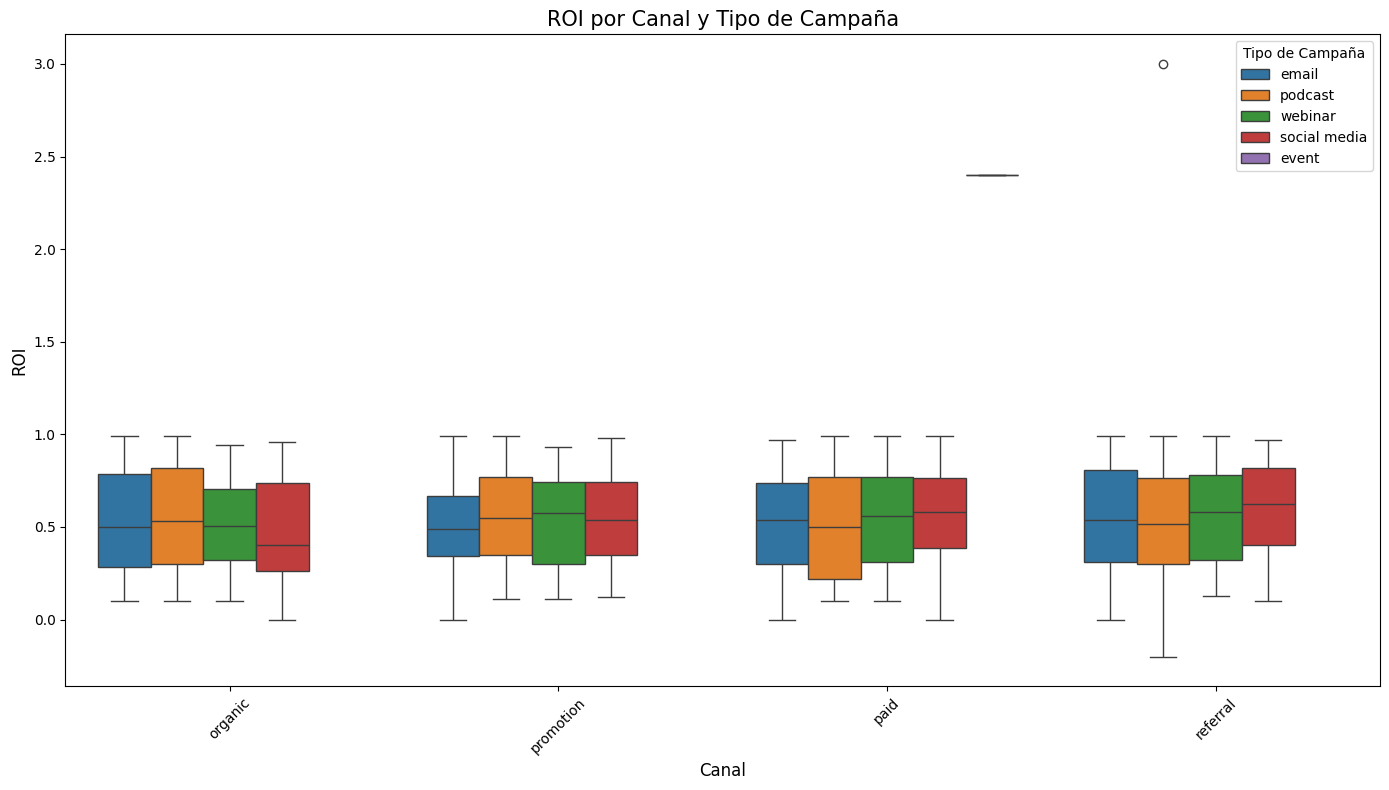

In [21]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='channel', y='roi', hue='type', data=df)
plt.title('ROI por Canal y Tipo de Campaña', fontsize=15)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Campaña')
plt.tight_layout()
plt.show()

6. Análisis por audiencia objetivo y canal

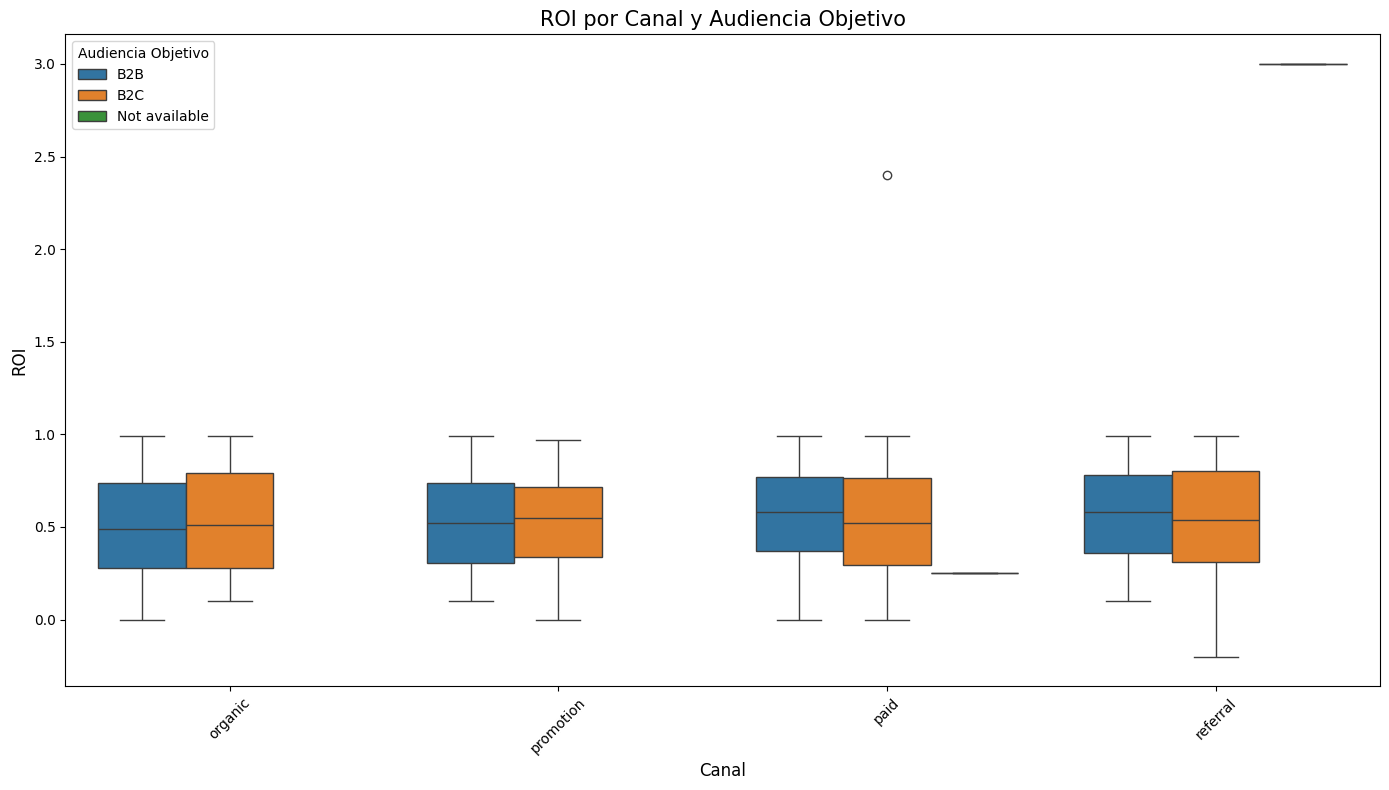

In [22]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='channel', y='roi', hue='target_audience', data=df)
plt.title('ROI por Canal y Audiencia Objetivo', fontsize=15)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Audiencia Objetivo')
plt.tight_layout()
plt.show()

7. Gráfico de dispersión para visualizar relación entre presupuesto y ROI por canal

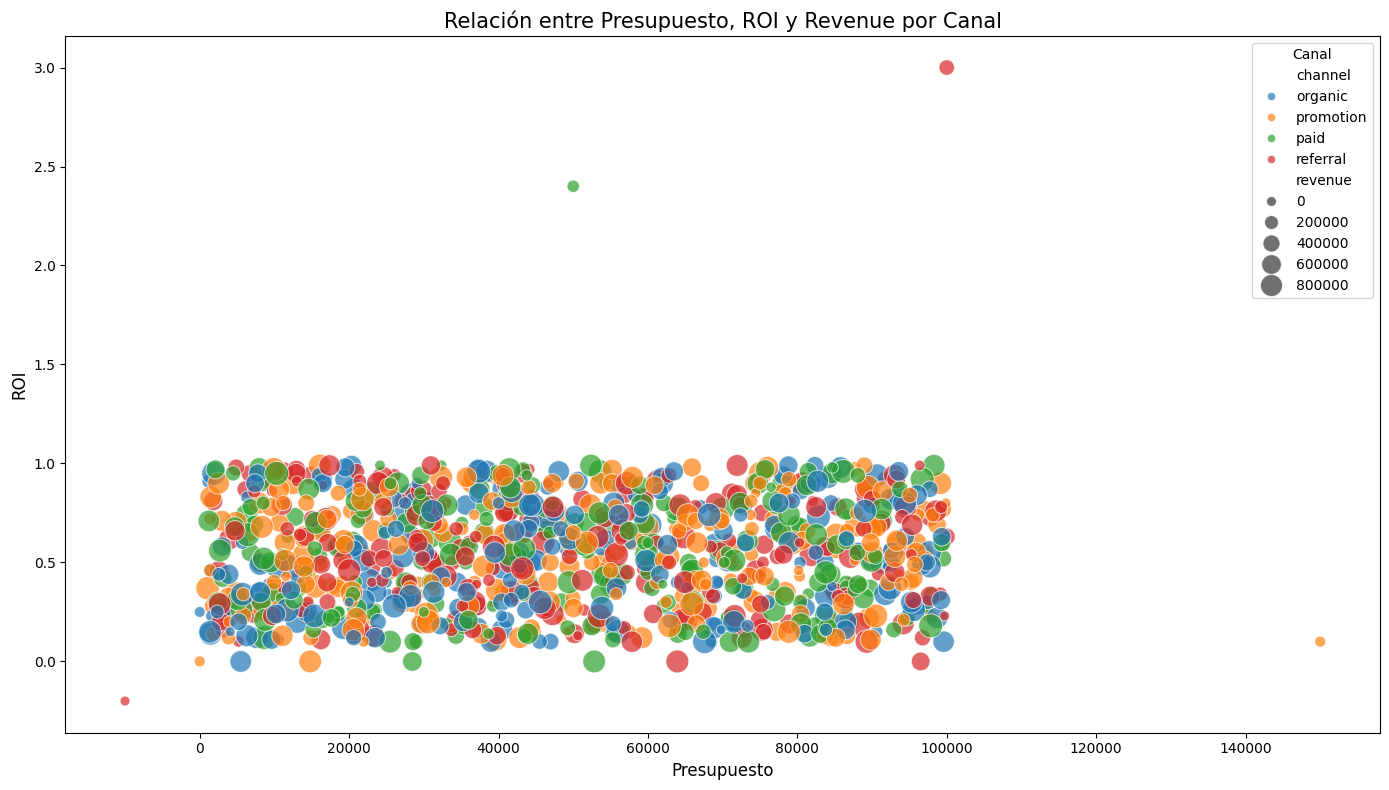

In [23]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='budget', y='roi', hue='channel', size='revenue', sizes=(50, 300), alpha=0.7, data=df)
plt.title('Relación entre Presupuesto, ROI y Revenue por Canal', fontsize=15)
plt.xlabel('Presupuesto', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.legend(title='Canal')
plt.tight_layout()
plt.show()

8. Tabla resumen con conclusiones principales

In [24]:
top_channels = channel_metrics.head(3)['channel'].tolist()
bottom_channels = channel_metrics.tail(3)['channel'].tolist()

print("\nCONCLUSIONES PRINCIPALES:")
print(f"- Canal más utilizado: {channel_counts.index[0]} con {channel_counts.values[0]} campañas")
print(f"- Canal con mejor ROI promedio: {channel_metrics.iloc[0]['channel']} ({channel_metrics.iloc[0]['roi']:.2f})")
print(f"- Canal con mejor tasa de conversión: {channel_metrics.sort_values('conversion_rate', ascending=False).iloc[0]['channel']} ({channel_metrics.sort_values('conversion_rate', ascending=False).iloc[0]['conversion_rate']:.2f})")
print(f"- Los tres canales con mejor ROI: {', '.join(top_channels)}")
print(f"- Los tres canales con menor ROI: {', '.join(bottom_channels)}")


CONCLUSIONES PRINCIPALES:
- Canal más utilizado: promotion con 275 campañas
- Canal con mejor ROI promedio: referral (0.56)
- Canal con mejor tasa de conversión: paid (0.55)
- Los tres canales con mejor ROI: referral, paid, promotion
- Los tres canales con menor ROI: paid, promotion, organic
